In [20]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,\
      MaxPool2D, Conv2D, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint 

In [21]:
IMG_SIZE=28
batch_size=200
epochs=30

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
x_train = x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],IMG_SIZE,IMG_SIZE,1).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [24]:
classifier = Sequential()
classifier.add(Conv2D(32, (3,3), input_shape=(IMG_SIZE,IMG_SIZE,1)))
# classifier.add(BatchNormalization(axis=-1))  
classifier.add(Activation('relu'))

classifier.add(Conv2D(32, (3,3)))
# classifier.add(BatchNormalization(axis=-1))
classifier.add(Activation('relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))
# classifier.add(BatchNormalization(axis=-1))

classifier.add(Conv2D(64, (3,3)))
# classifier.add(BatchNormalization(axis=-1))
classifier.add(Activation('relu'))

classifier.add(Conv2D(64, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())
# classifier.add(BatchNormalization())

classifier.add(Dense(512))
# classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

In [25]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
classifier.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [26]:
train_gen = ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.1,
                               shear_range=0.3,
                               height_shift_range=0.1,
                               zoom_range=0.1)
test_gen = ImageDataGenerator()

In [27]:
training_set = train_gen.flow(x_train,y_train,batch_size=batch_size)
test_set = train_gen.flow(x_test,y_test,batch_size=batch_size)

In [29]:
# model_save_path = 'straight_bs200e30_tf23.h5'
# checkpoint_callback = ModelCheckpoint(model_save_path,
#                                       monitor='val_accuracy',
#                                       save_best_only=True,
#                                       verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', # better than val_acc
                                               patience=3,
                                               mode='auto',
                                               verbose=1)

In [12]:
history = classifier.fit(training_set,
                         steps_per_epoch=len(x_train)//batch_size, # 300
                         validation_data=test_set,
                         validation_steps=len(x_test)//batch_size, # 50
                         epochs=epochs,
                        #  callbacks=[checkpoint_callback])
                         callbacks=[es_callback])

Epoch 1/30
300/300 [==============================] - 19s 62ms/step - loss: 0.3462 - accuracy: 0.8890 - val_loss: 0.0886 - val_accuracy: 0.9703
Epoch 2/30
300/300 [==============================] - 18s 61ms/step - loss: 0.0916 - accuracy: 0.9720 - val_loss: 0.0544 - val_accuracy: 0.9834
Epoch 3/30
300/300 [==============================] - 18s 61ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.0483 - val_accuracy: 0.9842
Epoch 4/30
300/300 [==============================] - 18s 61ms/step - loss: 0.0541 - accuracy: 0.9836 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 5/30
300/300 [==============================] - 18s 61ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0362 - val_accuracy: 0.9888
Epoch 6/30
300/300 [==============================] - 18s 59ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0331 - val_accuracy: 0.9906
Epoch 7/30
300/300 [==============================] - 17s 58ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0281 - val_accuracy:

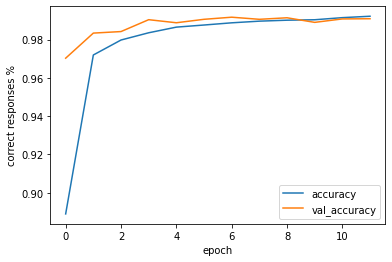

In [16]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

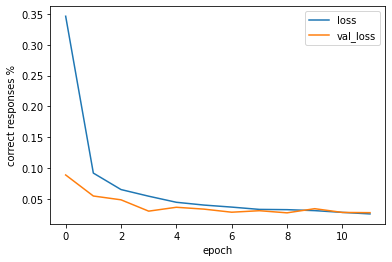

In [17]:
plt.plot(history.history['loss'],
         label='loss')
plt.plot(history.history['val_loss'],
         label='val_loss')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

In [21]:
classifier.save('es.h5')

In [22]:
# from google.colab import files
# files.download('es.h5')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>